## Config

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set_style("dark")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import matplotlib.pyplot as plt 
from matplotlib.dates import DateFormatter
# import statsmodels.api as sm
#df = pd.read_csv("new_twitter.tw_timeline.csv")
#df.describe()
# Instaling PyMongo, this is the interface to connect to MongoDB with Python
#! python -m pip install pymongo==3.7.2

In [2]:
from datetime import datetime, timedelta
import json
import unidecode
import unicodedata
import pymongo
from pymongo import MongoClient

# uri (uniform resource identifier) defines the connection parameters 
uri = 'url'
# start client to connect to MongoDB server 
client = MongoClient( uri )
db = client.appstore_reviews

In [3]:
listSubs = [
  {"name": "abertura", "keywords": [ "abertura", "abrir"]},
  {"name": "selfie", "keywords": [ "selfie", "camera", "reconhecimento", "facial"]},
  {"name": "senha", "keywords": [ "senha"]},
  {"name": "travamento", "keywords": [ "trava", "fecha", "carrega", "bugs", "bug"]},
  {"name": "limite", "keywords": [ "limite", "limites"]},
  {"name": "cartao", "keywords": [ "cartao", "cartoes"]},
  {"name": "atualizacao", "keywords": [ "novo", "nova, atualizou, atualizacao, atualizar"]}
]
# dictSubs = {
#     "abertura": "abertura", 
#     "abrir": "abertura", 
#     "selfie": "selfie",
#     "camera": "selfie",
#     "reconhecimento": "selfie",
#     "facial": "selfie",
#     "senha": "senha",
#     "trava": "travamento",
#     "fecha": "travamento",
#     "carrega": "travamento",
#     "bugs": "travamento",
#     "bug": "travamento",
#     "limite": "limite",
#     "limites": "limite",
#     "cartao": "cartao",
#     "cartao": "cartoes"
# }
# dictSubs

In [4]:
# listSubs = [
#   {"name": "abertura", "keywords": [ "abertura", "abrir", "selfie", "foto", "documentos", "nome", "telefone", "endereco", "cadastro", "termos", "atualizar", "atualizacao", "sistema operacional", "versao", "pj", "empresa", "mei", "sms", "link", "nao chega", "lentidao", "lento", "fecha", ""]},
#   {"name": "selfie", "keywords": [ "selfie", "camera", "reconhecimento", "facial"]},
#   {"name": "senha", "keywords": [ "senha"]},
#   {"name": "travamento", "keywords": [ "trava", "fecha", "carrega", "bugs", "bug"]},
#   {"name": "limite", "keywords": [ "limite", "limites"]},
#   {"name": "cartao", "keywords": [ "cartao", "cartoes"]},
#   {"name": "atualizacao", "keywords": [ "novo", "nova, atualizou, atualizacao, atualizar"]}
# ]

In [5]:
pipeline = [{"$match": {"dateISO": {"$gte": datetime(2022, 6, 1, 0, 0)} }},{ "$project": { "loja": 1, "text" : "$comment.text","score" : "$comment.score", "week": { "$week": "$dateISO" }, "dateISO":1, "_id": 0 } }, { "$sort" : { "dateISO" : -1 } }, { "$limit": 5000000}]

mongoList = list(db.reviews.aggregate(pipeline))

In [6]:
df_score = pd.DataFrame(mongoList)
df_score.head(50).text

0     Não consigo cadastrar a senha pois aparece uma...
1                                  Muito seguro e fácil
2                                           ótimo banco
3                                             muito bom
4     Péssimo essa nova atualização não tem a opção ...
5     Péssimo nessa nova atualização não tem a opção...
6                                   Facil de invadir...
7                                           ok tudo bem
8              excelente aplicativo.tudo bem funcional.
9                           BB está ótimo o aplicativo.
10                                                  bom
11    Um lixo de app, lento e quando funciona diz qu...
12    A última atualização corrigiu alguns problemas...
13                                  Prático e eficiente
14    App não tá mais chegando mensagem de movimenta...
15                                   o melhor banco top
16                                  Funciona muito bem.
17     Muito boa ótimo atendimento são todos ate

In [7]:
df_score['dt'] = df_score['dateISO'].dt.strftime("%Y-%m-%d")
df_score_date_google = df_score[df_score['loja'] == 'google'].groupby(["dt"])['score'].mean().reset_index(name="avg").sort_values(by=['dt'])
df_score_date_google

,dt,avg
0,2022-06-01,3.64
1,2022-06-02,3.36
2,2022-06-03,3.24
3,2022-06-04,3.37
4,2022-06-05,3.42
...,...,...
175,2022-12-04,3.32
176,2022-12-05,3.54
177,2022-12-06,3.38
178,2022-12-07,3.31


In [8]:
df_score_date_apple = df_score[df_score['loja'] == 'apple'].groupby(["dt"])['score'].mean().reset_index(name="avg").sort_values(by=['dt'])
df_score_date_apple

,dt,avg


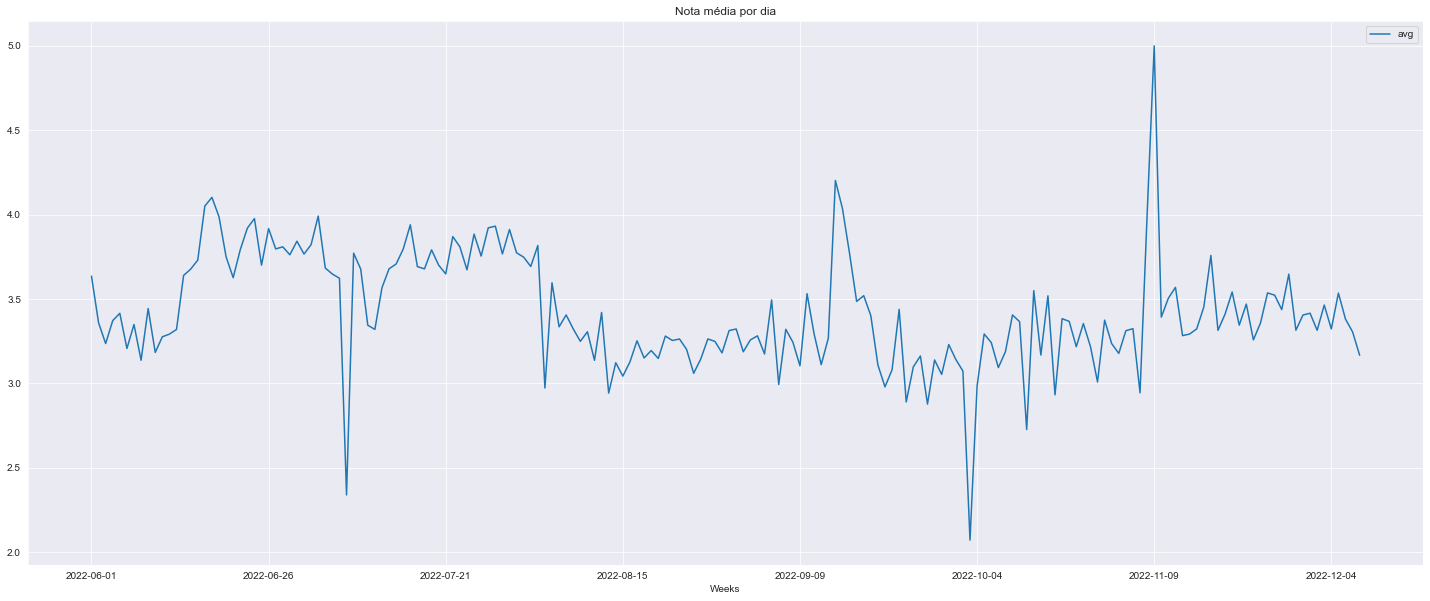

In [9]:
ax =  df_score_date_google.plot(figsize=(25,10),x="dt",xlabel="Weeks",y="avg",title="Nota média por dia", grid=True)

In [10]:
df_score

,loja,dateISO,text,score,week,dt
0,google,2022-12-08 08:26:02,Não consigo cadastrar a senha pois aparece uma...,1,49,2022-12-08
1,google,2022-12-08 08:17:09,Muito seguro e fácil,5,49,2022-12-08
2,google,2022-12-08 08:14:05,ótimo banco,5,49,2022-12-08
3,google,2022-12-08 08:07:35,muito bom,5,49,2022-12-08
4,google,2022-12-08 08:07:06,Péssimo essa nova atualização não tem a opção ...,1,49,2022-12-08
...,...,...,...,...,...,...
45212,google,2022-06-01 00:20:12,Muito bom. Uma mão nada. Mas precisa disponibi...,5,22,2022-06-01
45213,google,2022-06-01 00:05:02,"Não loga, fica dando fala no sistema, como con...",1,22,2022-06-01
45214,google,2022-06-01 00:05:02,"Não loga, fica dando fala no sistema, como con...",1,22,2022-06-01
45215,google,2022-06-01 00:00:50,Não funciona quando se precisa,1,22,2022-06-01


(3.0, 4.0)

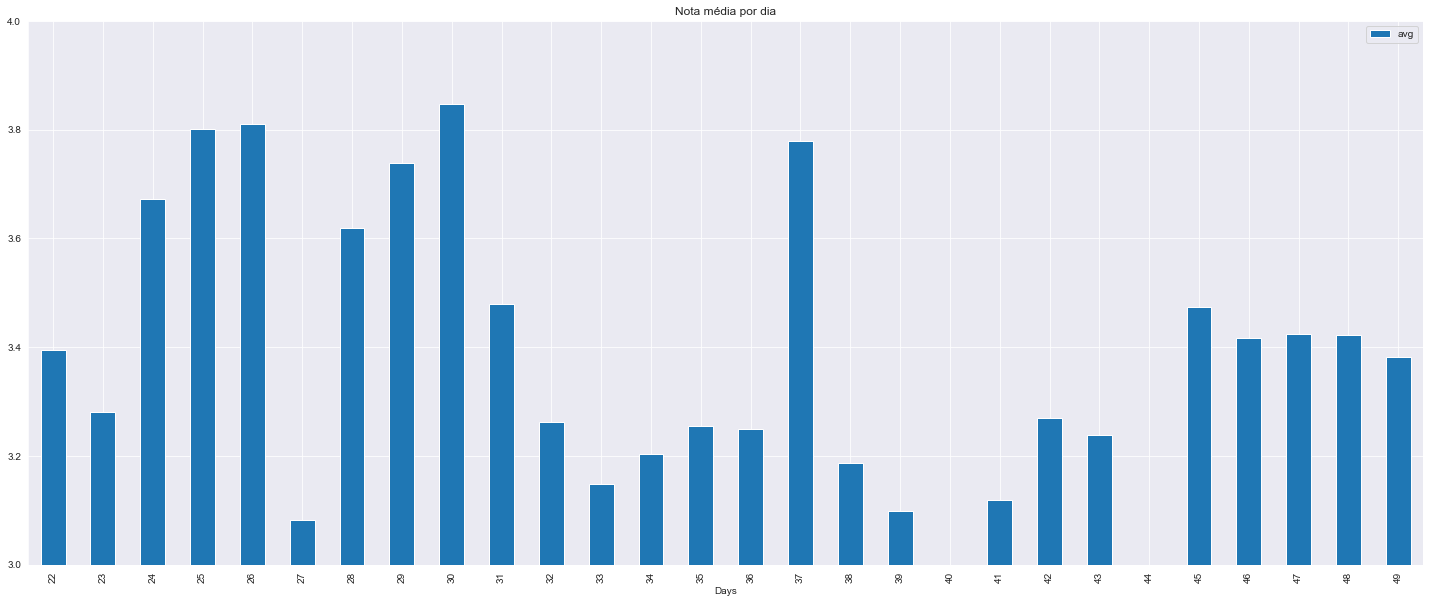

In [11]:
df_score['dt'] = df_score['dateISO'].dt.strftime("%Y-%m-%d")

df_score_date = df_score.groupby(["week"])['score'].mean().reset_index(name="avg").sort_values(by=['week'])
df_score_date
ax =  df_score_date.plot(figsize=(25,10),x="week",xlabel="Days",y="avg",title="Nota média por dia", grid=True,  kind = 'bar')
ax.set_ylim([3,4])

In [12]:
def remove_accents(string: str) -> str:
    normalized = unicodedata.normalize('NFKD', string)
    return ''.join([c for c in normalized if not unicodedata.combining(c)])


total_date = {"date": [], "score": [], "week": []}
stats_subs = {"date":[],"sub": [], "score": [], "week": []}
count_tweets = 0
for mongo in mongoList:
  count_tweets += 1
for mongo in mongoList:
  day = mongo['dateISO'].strftime("%Y-%m-%d")
  dt = datetime.strptime(day, '%Y-%m-%d')
  start = dt - timedelta(days=dt.weekday()+1)
  total_date["date"].append(mongo['dateISO'].strftime("%Y-%m-%d"))
  total_date["score"].append(mongo['score'])
  total_date["week"].append(start.strftime('%Y-%m-%d'))
  for sub in listSubs:
    #print(sub['keywords'])
    isRec = False
    for word in sub['keywords']:
      if isRec == False:
        ##clean_text = unidecode.unidecode(mongo["text"])
        clean_text = remove_accents(mongo["text"])
        # print(clean_text)
        if word in clean_text:
          stats_subs["date"].append(mongo['dateISO'].strftime("%Y-%m-%d"))
          stats_subs["score"].append(mongo['score'])

          ##stats_subs["scorePercent"].append(int(mongo['score'])/len(mongoList))

          stats_subs["sub"].append(sub['name'])


          stats_subs["week"].append(start.strftime('%Y-%m-%d'))
          #total_week["week"] += 1
          isRec = True
data = pd.DataFrame(stats_subs)
dataTotal = pd.DataFrame(total_date)

In [13]:
dataTotalScore = dataTotal[dataTotal["score"] <= 3]
dataTotalScore

,date,score,week
0,2022-12-08,1,2022-12-04
4,2022-12-08,1,2022-12-04
5,2022-12-08,1,2022-12-04
6,2022-12-08,1,2022-12-04
7,2022-12-08,1,2022-12-04
...,...,...,...
45207,2022-06-01,1,2022-05-29
45213,2022-06-01,1,2022-05-29
45214,2022-06-01,1,2022-05-29
45215,2022-06-01,1,2022-05-29


In [14]:
dataScore = data[data["score"] <= 3]
dataScore

,date,sub,score,week
0,2022-12-08,senha,1,2022-12-04
1,2022-12-08,selfie,1,2022-12-04
4,2022-12-08,abertura,1,2022-12-04
5,2022-12-08,senha,1,2022-12-04
6,2022-12-07,cartao,3,2022-12-04
...,...,...,...,...
10084,2022-06-01,selfie,1,2022-05-29
10089,2022-06-01,abertura,1,2022-05-29
10090,2022-06-01,abertura,1,2022-05-29
10091,2022-06-01,senha,2,2022-05-29


## Análises

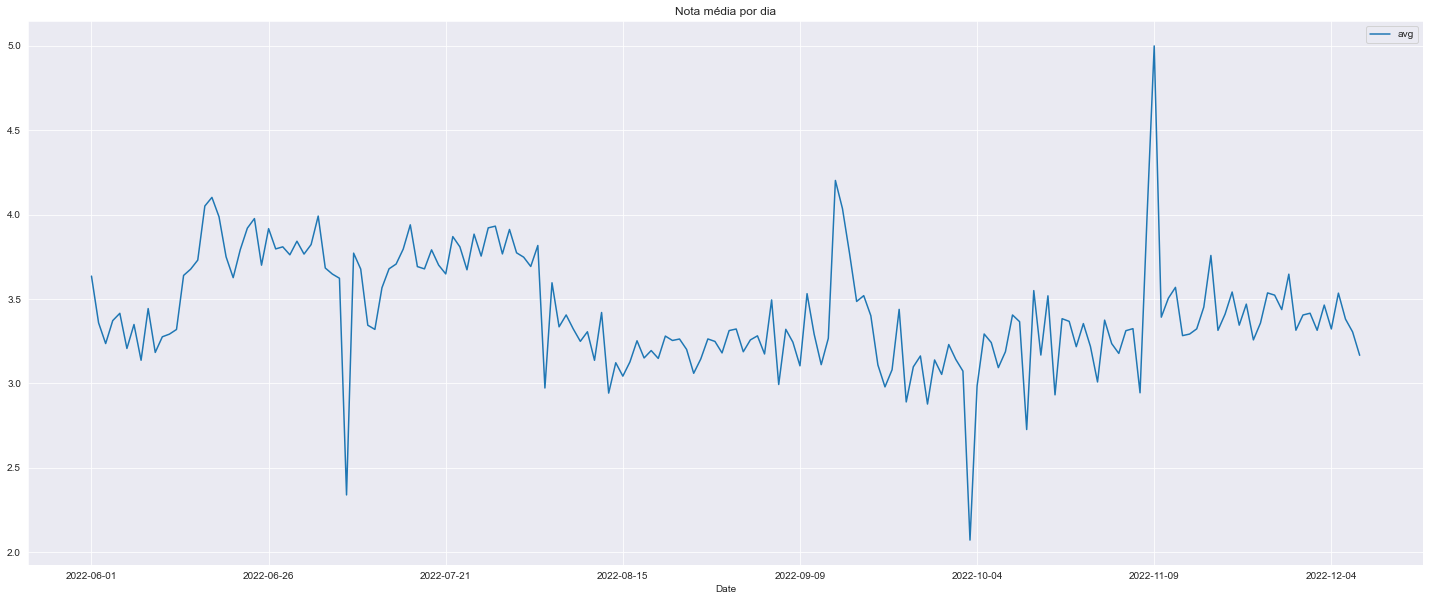

In [15]:
data_total_date = df_score.groupby(["dt"])['score'].mean().reset_index(name="avg").sort_values(by=['dt'])
ax =  data_total_date.plot(figsize=(25,10),x='dt',xlabel="Date",title="Nota média por dia", grid=True)

(3.0, 4.0)

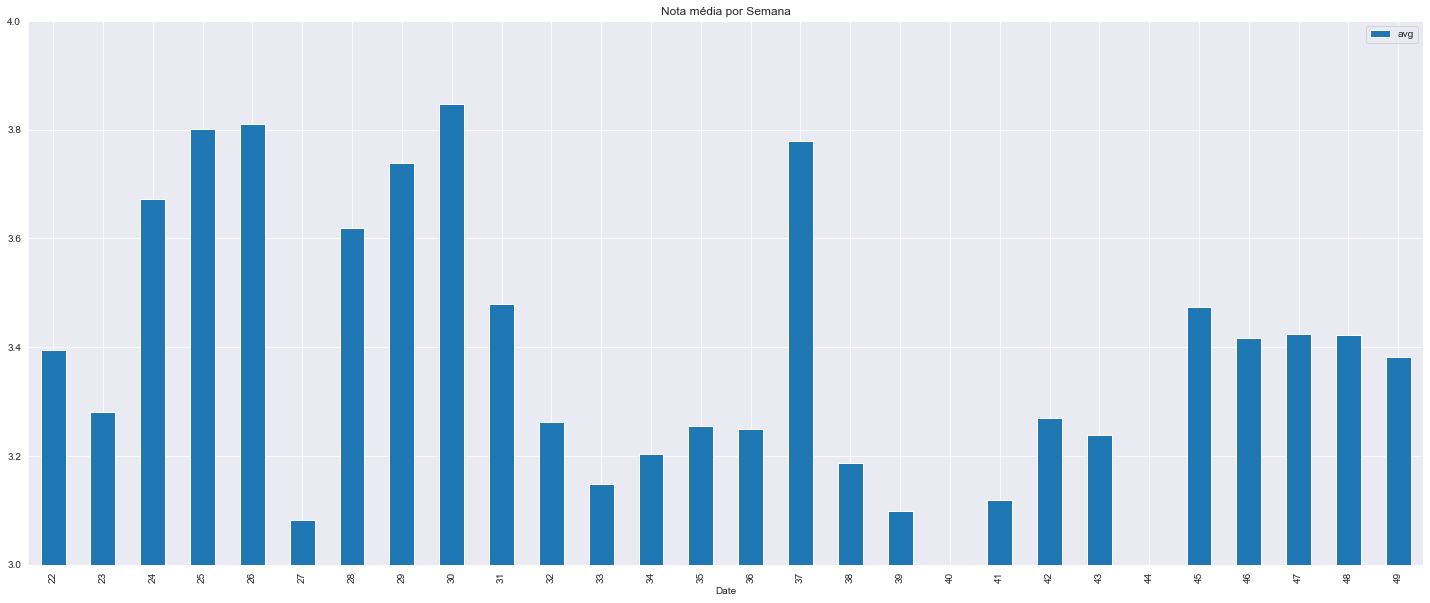

In [16]:
data_total_date = df_score.groupby(["week"])['score'].mean().reset_index(name="avg").sort_values(by=['week'])
data_total_date
ax =  data_total_date.plot(figsize=(25,10),x='week',xlabel="Date",title="Nota média por Semana", kind="bar", grid=True)
ax.set_ylim([3,4])

In [17]:
dataTotalGroupedDate = dataTotalScore.groupby(["week"]).size().reset_index(name="total").sort_values(by=['week'])
# dataTotalGroupedDate
# dataConcat = pd.concat([data, dataTotalGroupedDate])
# dataConcat

In [18]:
#Pode ser "week" ou "date"
metric = "week"
dataOrdered = dataScore.groupby([metric, 'sub']).size().reset_index(name='counts').sort_values(by=['sub', metric])
dataPivot = dataOrdered.pivot_table(index=[metric],values=["counts"],columns=["sub"],aggfunc=np.sum,fill_value=0)
dataPivot.columns = dataPivot.columns.droplevel(0)
dataPivot = dataPivot.reset_index()
dataPivot[metric] = pd.to_datetime(dataPivot[metric])
dataPivot.set_index(metric)
dictTotalGroupedDateClean = {}
for index, row in dataPivot.iterrows():
    weekClean = row[metric].strftime("%Y-%m-%d")
    total = dataTotalGroupedDate[dataTotalGroupedDate[metric] == weekClean]["total"].values[0]
    # dictTotalGroupedDateClean[weekClean] = total
    dictTotalGroupedDateClean[total] = weekClean
    # print(dataTotalGroupedDate[dataTotalGroupedDate[metric] == weekClean]["total"].values[0])
# dictTotalGroupedDateClean
#dataPivot['total'] = dictTotalGroupedDateClean
# ax = dataPivot.plot(figsize=(25,10),x=metric,xlabel="Weeks",xticks=list(dataPivot[metric].unique()),grid=True, ylim={0,350})
dataPivot

sub,week,abertura,atualizacao,cartao,limite,selfie,senha,travamento
0,2022-05-29,99,18,89,16,27,93,63
1,2022-06-05,151,27,139,34,30,86,73
2,2022-06-12,58,8,76,17,9,30,31
3,2022-06-19,46,8,54,13,10,29,26
4,2022-06-26,50,15,42,17,11,36,26
5,2022-07-03,93,15,81,34,14,137,103
6,2022-07-10,54,7,80,23,12,34,31
7,2022-07-17,45,14,54,14,5,33,25
8,2022-07-24,53,10,49,16,14,28,27
9,2022-07-31,107,37,84,27,7,62,77


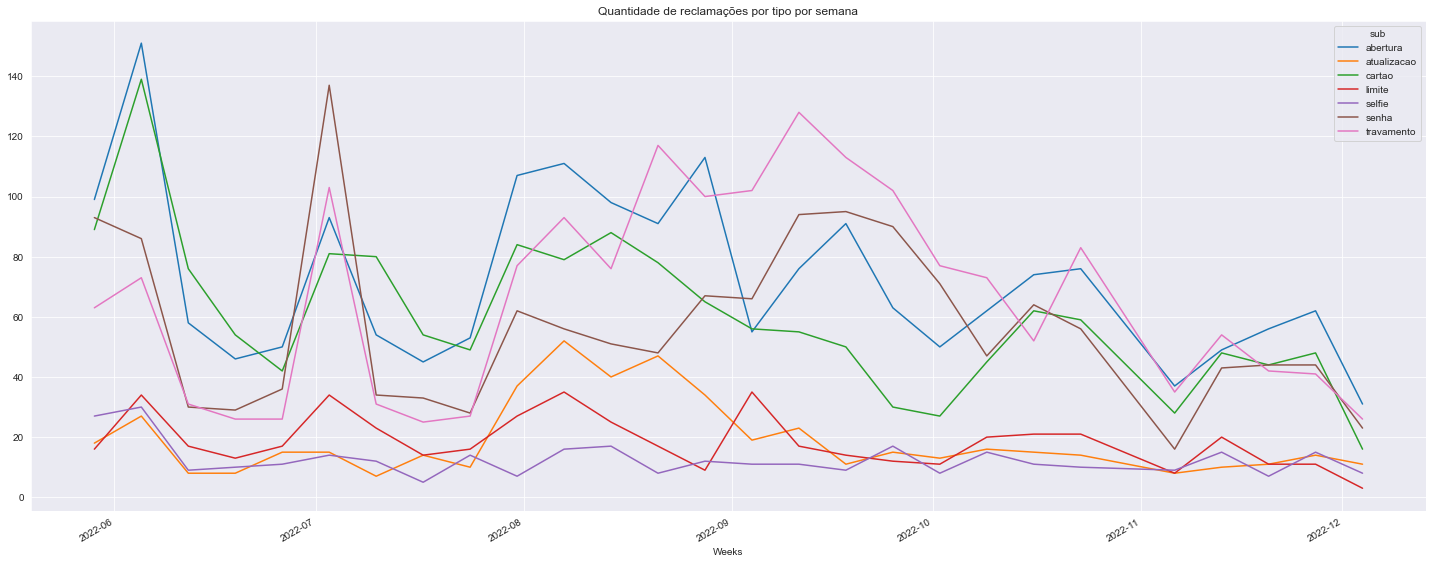

In [19]:
ax =  dataPivot.plot(figsize=(25,10),x=metric,xlabel="Weeks",title="Quantidade de reclamações por tipo por semana", grid=True)

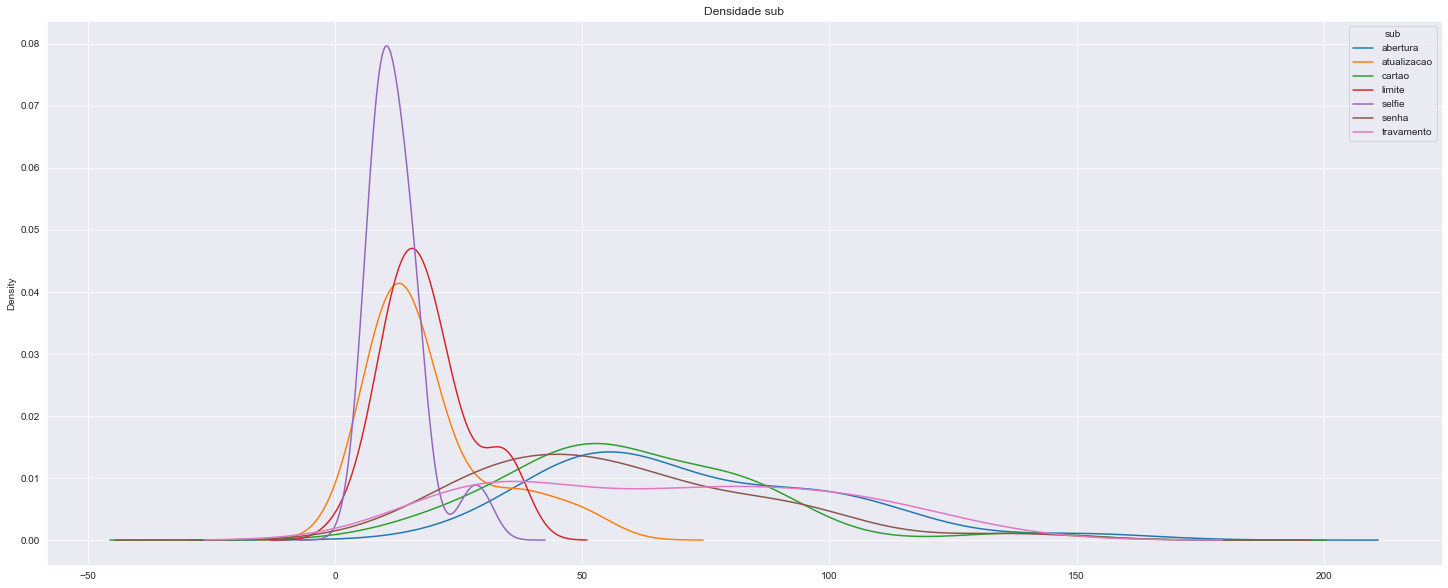

In [20]:
ax =  dataPivot.plot(figsize=(25,10),x=metric,xlabel="Weeks",title="Densidade sub", kind="kde", grid=True)

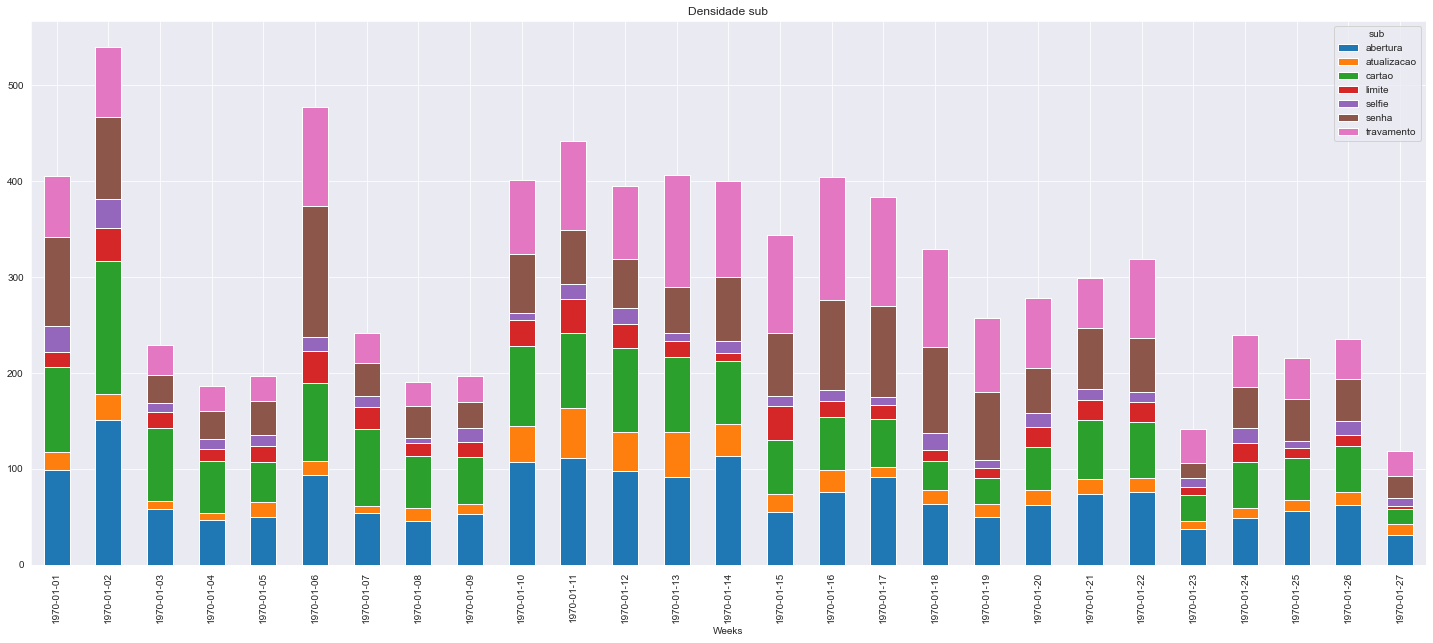

In [21]:
dataPivot
ax =  dataPivot.plot(figsize=(25,10),x="week",xlabel="Weeks",title="Densidade sub", kind="bar", grid=True, stacked=True)

date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)


In [22]:
dataPivot_indexed = dataPivot.reset_index().set_index('week')

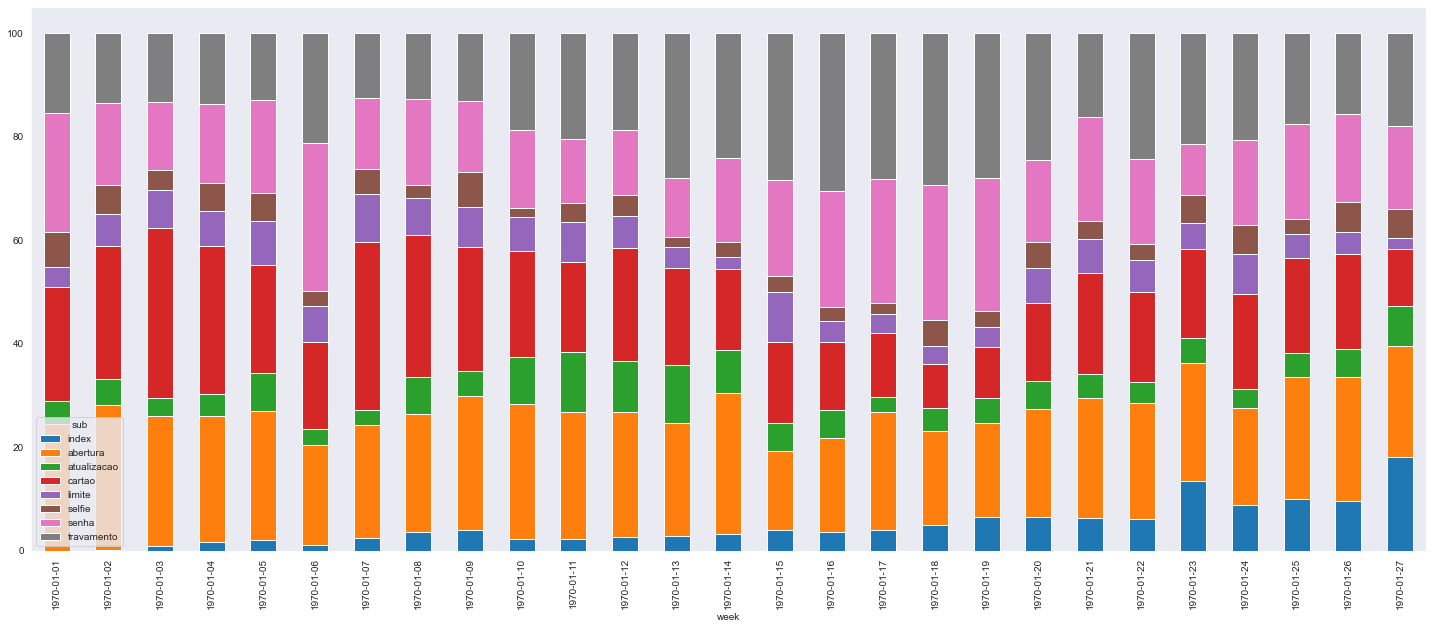

In [23]:
stacked_data = dataPivot_indexed.apply(lambda x: x*100/sum(x), axis=1)
ax = stacked_data.plot(kind="bar", stacked=True, figsize=(25,10))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)

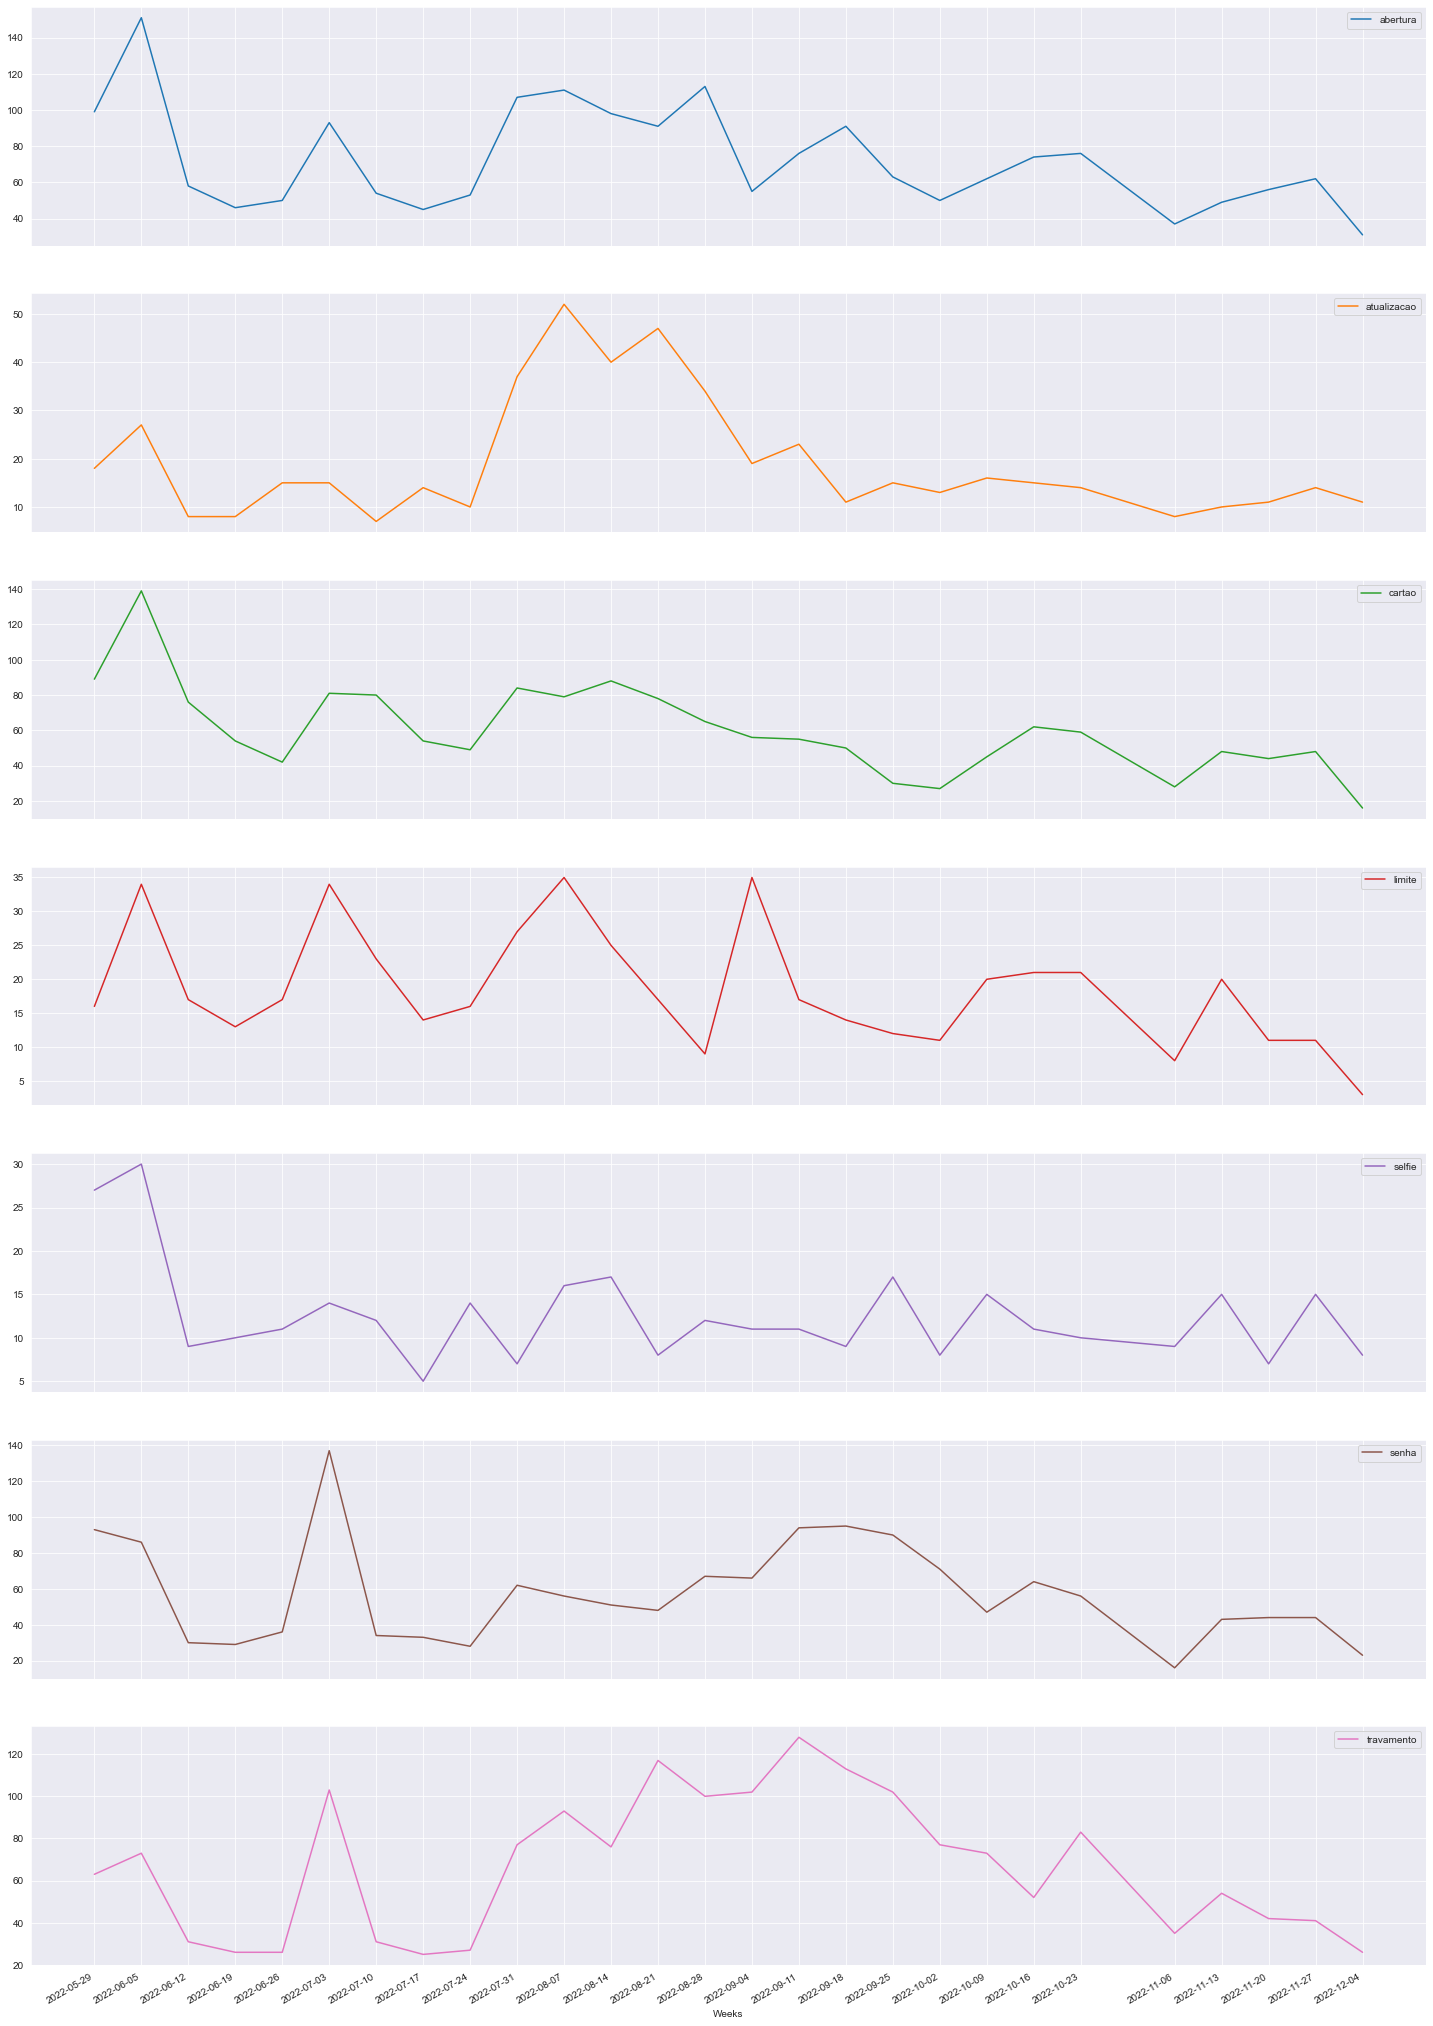

In [24]:
ax = dataPivot.plot(figsize=(25,40),x=metric,xlabel="Weeks",xticks=list(dataPivot[metric].unique()),grid=True, subplots=True)

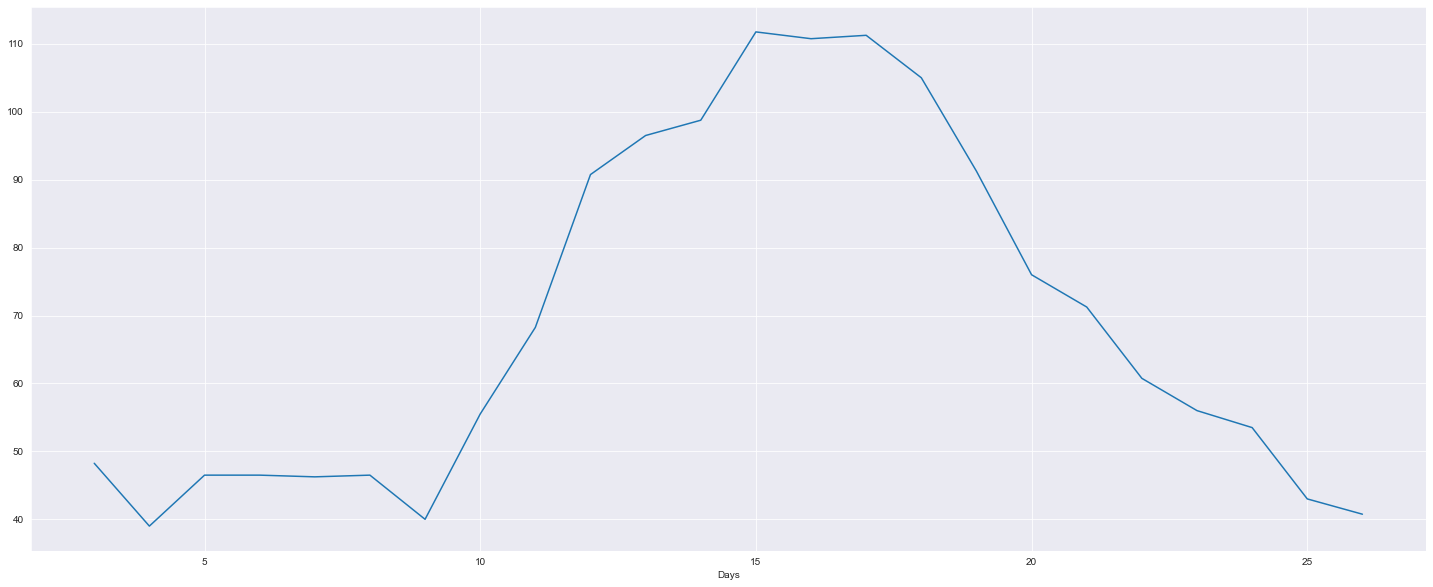

In [25]:
ax =  dataPivot["travamento"].rolling(4).mean().plot(figsize=(25,10),x="date",xlabel="Days",grid=True)

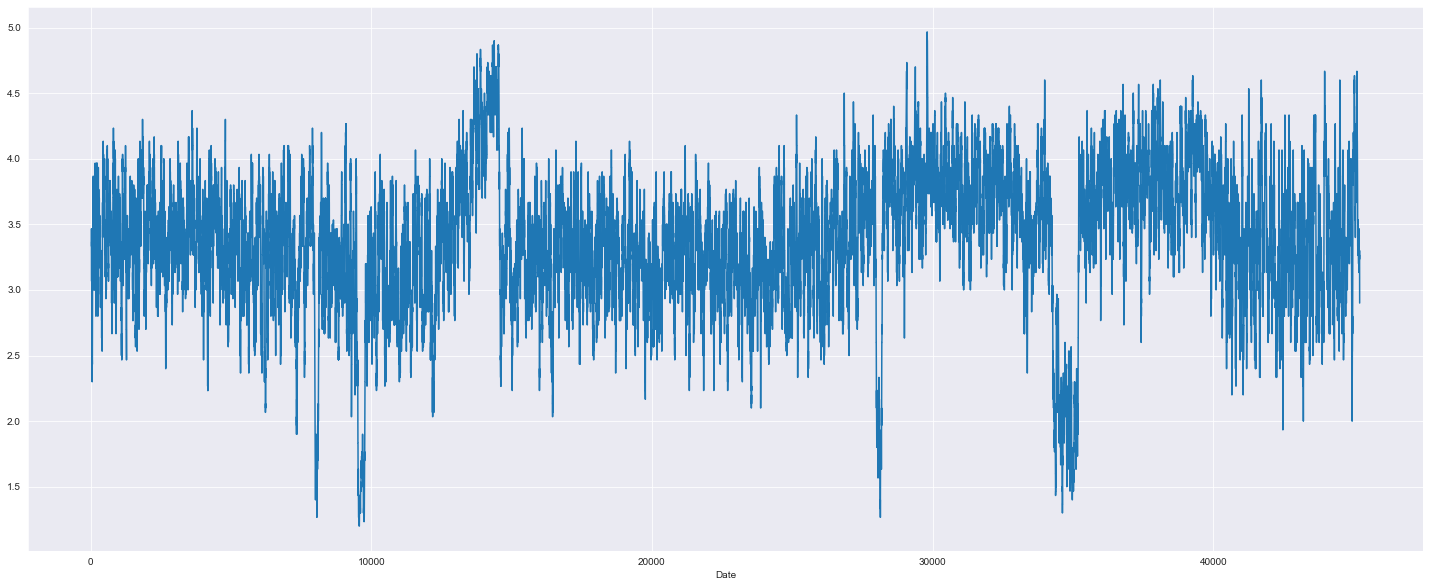

In [26]:
ax =  df_score["score"].rolling(30).mean().plot(figsize=(25,10),x="dt",xlabel="Date",grid=True)

In [27]:
df_score["score"]

0        1
1        5
2        5
3        5
4        1
        ..
45212    5
45213    1
45214    1
45215    1
45216    1
Name: score, Length: 45217, dtype: int64

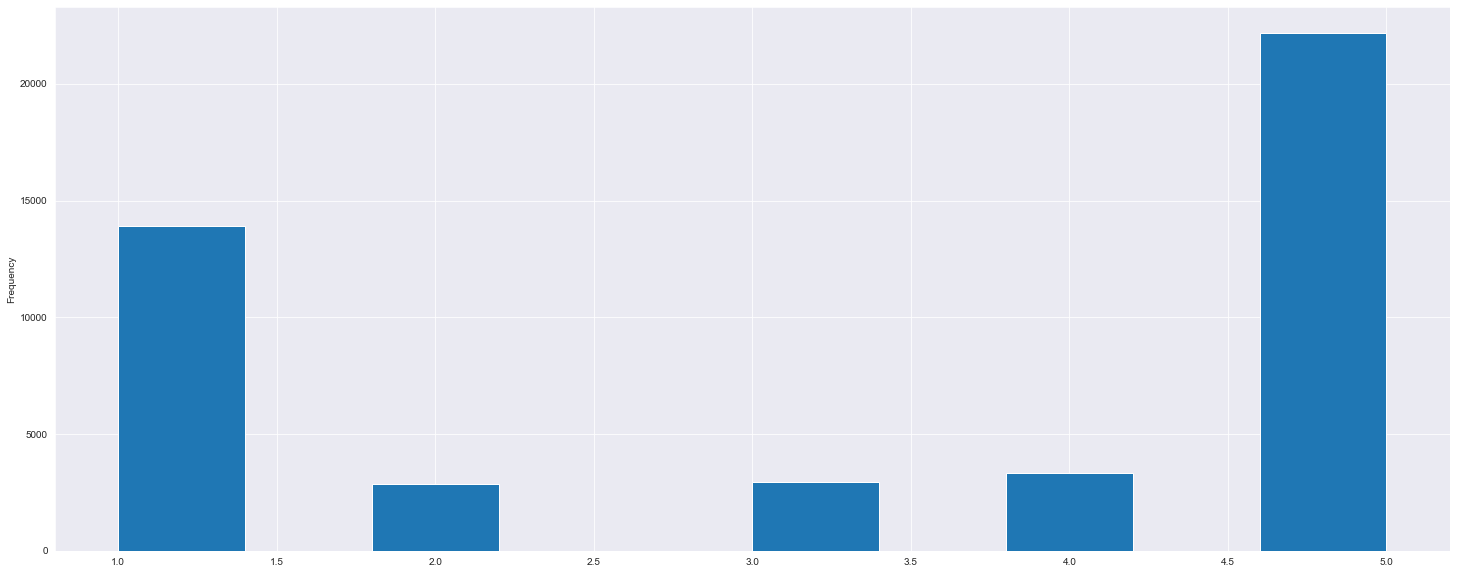

In [28]:
ax =  df_score["score"].plot(figsize=(25,10),x="dt",xlabel="Date", kind="hist",grid=True)

In [29]:
dataConcat = pd.concat([dataOrdered, dataTotalGroupedDate],axis=1)
dataConcat

,week,sub,counts,week,total
0,2022-05-29,abertura,99,2022-05-29,765.00
7,2022-06-05,abertura,151,2022-07-17,468.00
14,2022-06-12,abertura,58,2022-09-04,785.00
21,2022-06-19,abertura,46,2022-10-23,679.00
28,2022-06-26,abertura,50,NaN,NaN
...,...,...,...,...,...
160,2022-11-06,travamento,35,NaN,NaN
167,2022-11-13,travamento,54,NaN,NaN
174,2022-11-20,travamento,42,NaN,NaN
181,2022-11-27,travamento,41,NaN,NaN


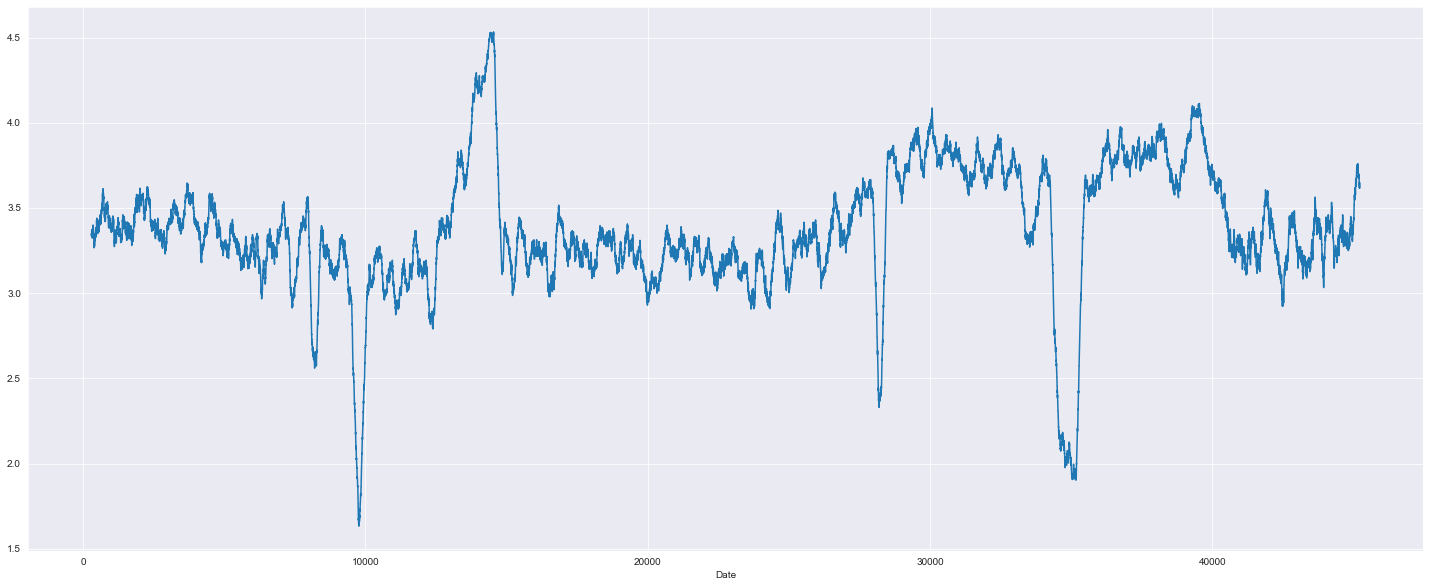

In [30]:
ax =  df_score["score"].rolling(300).mean().plot(figsize=(25,10),x="dt",xlabel="Date",grid=True)

In [31]:
score_rolling = df_score["score"].rolling(300).mean()
score_rolling

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
45212   3.65
45213   3.65
45214   3.64
45215   3.63
45216   3.62
Name: score, Length: 45217, dtype: float64